In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_excel(r"C:\Users\meghi\Downloads\survey.xls")

In [8]:
df

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [9]:
dt=df.copy()

In [10]:
dt

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12 non-null     object
 1   Nationality  12 non-null     object
 2   Sex          12 non-null     object
 3   Age          12 non-null     int64 
 4   Handedness   12 non-null     object
dtypes: int64(1), object(4)
memory usage: 608.0+ bytes


In [12]:
#In this data we can say that the information we are having has 12 rows and 5 columns.
#by the information we can also say that they are one integer type(age) and 4 objects(name,nationality,sex,handedness)
#by this we can say there is no null value 

In [14]:
dt.describe()

,Age
count,12.000000
mean,32.833333
std,12.861736
min,18.000000
25%,22.750000
50%,31.000000
75%,38.500000
max,58.000000


In [15]:
#by this descripition we can say the count, mean, std, min, max, precentile

# outliners

In [21]:
x1=np.percentile(dt["Age"],[25,50,100])

In [22]:
x1

array([22.75, 31.  , 58.  ])

In [25]:
q1=x1[0]
q2=x1[1]
q3=x1[2]

In [27]:
iqr=q3-q1

In [28]:
iqr

35.25

In [32]:
lb=q1-(iqr*1.5) 
up=q3+(iqr*1.5)

In [33]:
lb

-30.125

In [35]:
up

110.875

In [36]:
dt.loc[dt["Age"]<lb]

,Name,Nationality,Sex,Age,Handedness


In [37]:
dt.loc[dt["Age"]>up]

,Name,Nationality,Sex,Age,Handedness


In [38]:
#by the above information we can say they are no outliners

In [39]:
dt

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


# problem statement 
# seperate nationality with handedness

In [41]:
#by the problem statement 
#we are having categorical and numerical data (bi variate)
#then we can use the barplot, distplot, boxplot to analysis the data


In [50]:
dt

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [56]:
pd.crosstab(dt.Nationality,dt.Handedness,margins=True)

Handedness,Left,Right,All
Nationality,,,
Bangadesh,2,0,2
China,2,1,3
India,2,1,3
USA,1,3,4
All,7,5,12


In [57]:
#as we crosstab the data we can say that they are totally 12 people
#in that 12, 7 are left handedness and 5 are right handedness.
#they are totally 2 people in bangadesh who are left handedness
#they are totally 3 people in china in that 2 are left handedness and 1 is right handedness
#they are totally 3 people in india in that 2 are left handedness and 1 is right handedness
#they are totally 4 people in USA in that 1 is left handedness and 3 are right handedness


C:\Users\meghi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nationality', ylabel='count'>

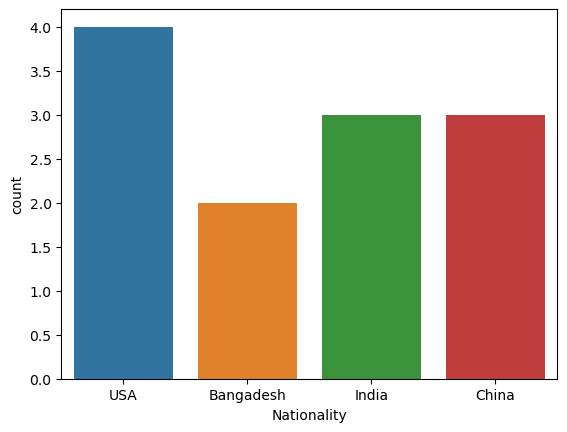

In [70]:
sns.countplot(dt['Nationality'])

In [ ]:
#here by using the countplot we can say the nationality count.

In [89]:
dt["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

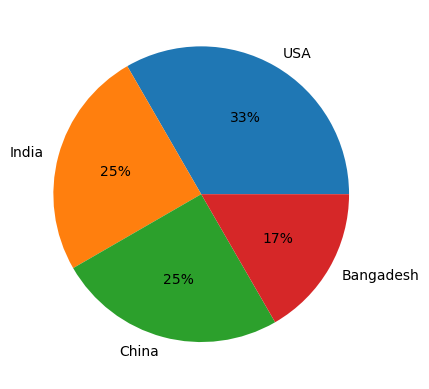

In [68]:
plt.pie([4,3,3,2],labels=["USA","India","China","Bangadesh"],autopct='%0.0f%%')
plt.show()

In [ ]:
#by the pie chart we can say the exact percentage of the nationality

<AxesSubplot:xlabel='Handedness', ylabel='Count'>

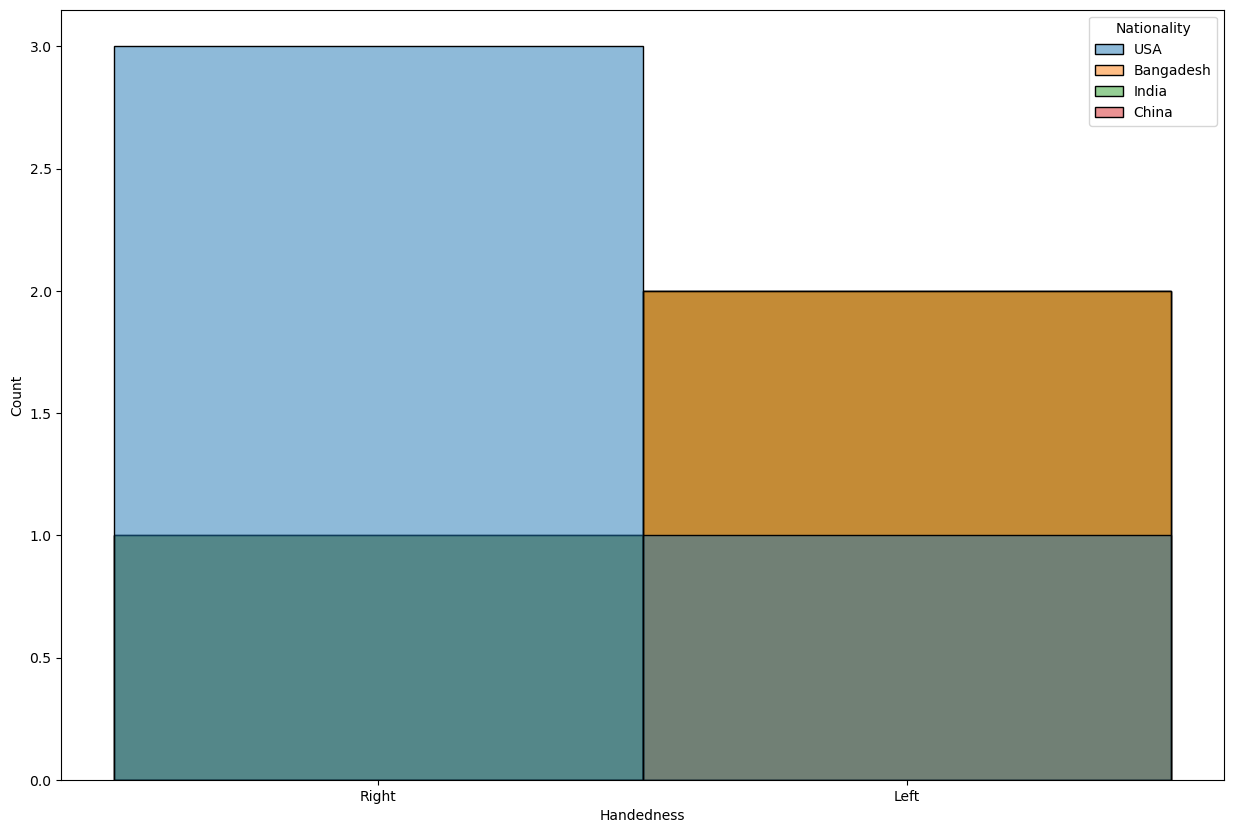

In [74]:
plt.figure(figsize=(15,10))
sns.histplot(data=dt,x="Handedness",bins=10,hue="Nationality",color="r")

<AxesSubplot:>

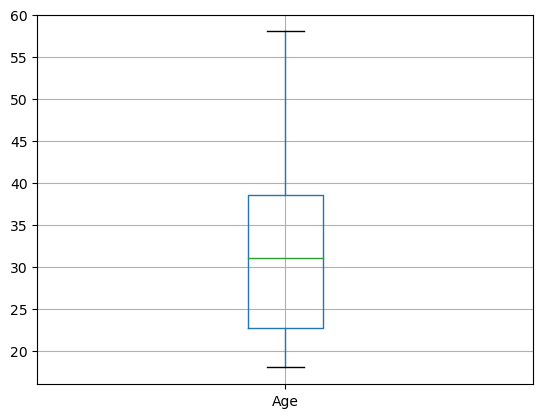

In [76]:
dt.boxplot()

In [ ]:
#here in boxplot we can do only numeric values as in our data age is in the form of numeric values

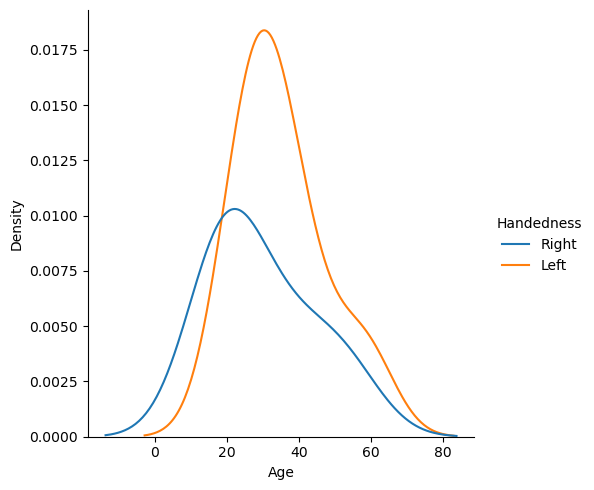

In [82]:
sns.displot(data=dt,x="Age",hue="Handedness",kind="kde")

In [ ]:
#in distplot we need one numeric and one categorical data for that 
#in here our problem statement will be of age vs handedness


C:\Users\meghi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Nationality'>

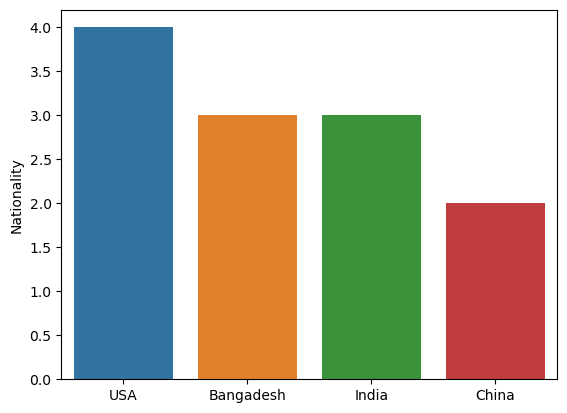

In [84]:
sns.barplot(dt["Nationality"].unique(),dt["Nationality"].value_counts())

C:\Users\meghi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Handedness'>

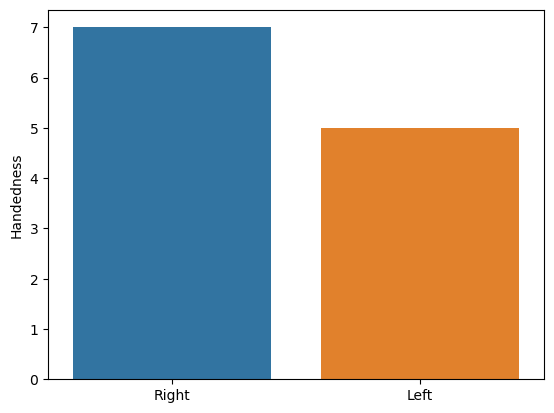

In [85]:
sns.barplot(dt["Handedness"].unique(),dt["Handedness"].value_counts())

In [ ]:
#by the bar plot we can say about univariate that means we say about the nationality count and also the handedness count

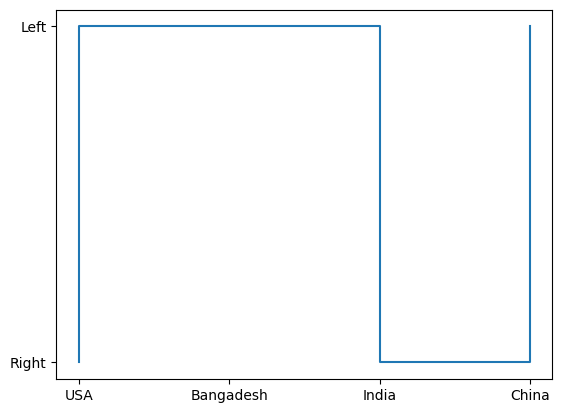

In [88]:
plt.plot(dt["Nationality"],dt["Handedness"])


In [90]:
#by this we can say the line plot by using nationality and handedness

# conclusion

By the problem statement
Which is seperating the nationality and handedness 
And also we can say the percentages as in which nationality how many people are they in right handedness and left handedness.
As our problem statement is of numeric vs categorial
We use those plot to describe our analysis.

